In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np


In [ ]:
customer_data = pd.read_csv("/content/drive/MyDrive/shopping_data.csv")

In [ ]:
customer_data.shape

(200, 5)

In [ ]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


to view the result in 2D features space, we will retain only 2 of these five columns. we can remove id,gender, age. The 'spending score' signifies how often a person spends money  in a mall on a scale of  1 to 100 with 100 being the highest spender

In [ ]:
# filter the first 3 columns for our dataset
data = customer_data.iloc[:, 3:5].values

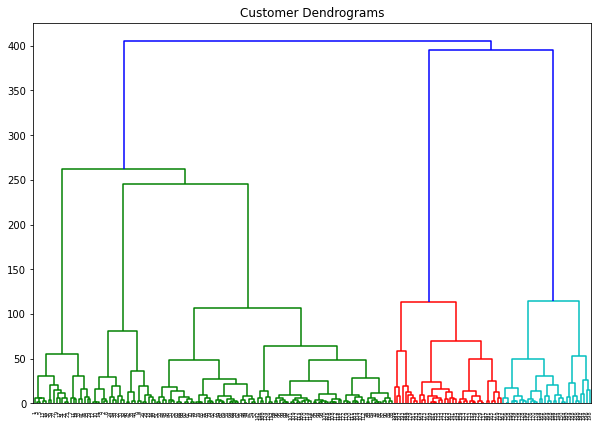

In [ ]:
# next we need to know the clusters that we want our data to be split too.
# uses the spicy library to create the dendrograms for our datset

import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(data, method = 'ward'))

# the 'linkage' method takes the dataset and the method to minimize the distance as parameters.
# we use 'ward'method minimizes the varients of distances bw the clusters

In [ ]:
# if we draw a horizontal line that passes through longest distance without line, we get 5 clusters as shown above
# the next step is to group the data points to these five clusters
# so we will again use the agglomerative clustering class of the sklearn cluster library

In [ ]:
from sklearn import cluster
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

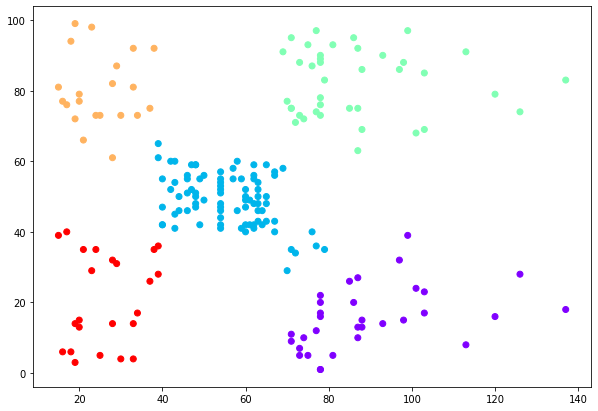

In [ ]:
# plot the clusters to see how actually our data has been clusterd

plt.figure(figsize=(10,7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_,cmap='rainbow')